In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


# Question 1: basic Q-learning performance.

### Implentation: 
- The code for running the DQN can by found in dqn.py
- The result was obtained on AWS on a g2.2xlarge EC2 instances type. 
- I used Huber loss instead of mean square error.
- I also used tf.stop_gradient for the target network, though I don't think this was necessary. 

### Results: 
- My average return did not increase as fast as the reference solution by 1m steps, but that could have been my random seed. However, it did get to optimal performance by 3.5m. 
- I'm not sure why my best and mean returns are so close. They are not identical. 


In [109]:
date = '2017-09-30-23:02'

In [110]:
time_steps = np.loadtxt('results/time_steps'+date+'.txt')
mean_returns = np.loadtxt('results/mean_episode_rewards'+date+'.txt')
best_returns = np.loadtxt('results/best_mean_episode_rewards'+date+'.txt')
df=pd.DataFrame({'time_steps':time_steps,'mean_returns':mean_returns,'best_returns':best_returns})
#df.head()

In [111]:
#best_returns

In [112]:
df = df.set_index('time_steps',drop=True)

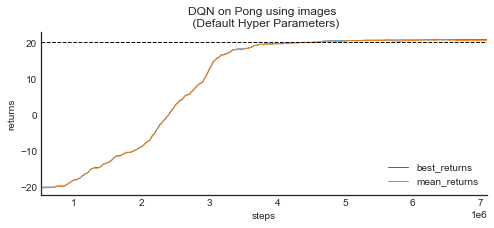

In [113]:
sns.set_style('white')

df.plot(linewidth=1,figsize=(8,3))

plt.title('DQN on Pong using images \n (Default Hyper Parameters)')
plt.axhline(y=20,linestyle='--',color='k',linewidth=1)
sns.despine()
plt.ylabel('returns')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('steps')

plt.savefig('figs/Q1.png',dpi=300)

# Question 2: experimenting with hyperparameters.

### Exploration  
For this question, I experimented with differnent exploration schedules and compared the performance to the default schedule. I also ran my DQN algorithm on the Pong with full images. Each round until convergence took ~10+ hrs.


### Exploration Schedules
- baseline goes to 0.1 after 1m steps, then down to 0.01 after 5m
- more exploration goes to 0.1 after 2m steps, then down to 0.01 after 5m
- even more exploration goes to 0.1 after 2.5m steps, then down to 0.01 after 5m
- less exploration at end goes to 0.1 after 1m steps like baseline, but goes down to 0.001 after 5m steps. 



In [114]:
# load in data
date = '2017-09-30-23:02'
time_steps = np.loadtxt('results/time_steps'+date+'.txt')
mean_returns = np.loadtxt('results/mean_episode_rewards'+date+'.txt')
best_returns = np.loadtxt('results/best_mean_episode_rewards'+date+'.txt')
explorations = np.loadtxt('results/explorations'+date+'.txt')
df=pd.DataFrame({'time_steps':time_steps,'baseline (mean)':mean_returns,'baseline (best)':best_returns})
df = df.set_index('time_steps',drop=True)


date = '2017-10-01-23:40'
time_steps2 = np.loadtxt('results/time_steps'+date+'.txt')
mean_returns2 = np.loadtxt('results/mean_episode_rewards'+date+'.txt')
best_returns2= np.loadtxt('results/best_mean_episode_rewards'+date+'.txt')
explorations2 = np.loadtxt('results/explorations'+date+'.txt')
df2=pd.DataFrame({'time_steps':time_steps2,'more exploration (mean)':mean_returns2,'more exploration (best)':best_returns2})
df2 = df2.set_index('time_steps',drop=True)


date = '2017-10-02-17:06'
time_steps3 = np.loadtxt('results/time_steps'+date+'.txt')
mean_returns3 = np.loadtxt('results/mean_episode_rewards'+date+'.txt')
best_returns3 = np.loadtxt('results/best_mean_episode_rewards'+date+'.txt')
explorations3 = np.loadtxt('results/explorations'+date+'.txt')
df3=pd.DataFrame({'time_steps':time_steps3,'even more exploration (mean)':mean_returns3,'even more exploration (best)':best_returns3})
df3 = df3.set_index('time_steps',drop=True)


date = '2017-10-03-08:19'
time_steps4 = np.loadtxt('results/time_steps'+date+'.txt')
mean_returns4 = np.loadtxt('results/mean_episode_rewards'+date+'.txt')
best_returns4 = np.loadtxt('results/best_mean_episode_rewards'+date+'.txt')
explorations4= np.loadtxt('results/explorations'+date+'.txt')
df4=pd.DataFrame({'time_steps':time_steps4,'less exploration at end (mean)':mean_returns4,'less exploration at end (best)':best_returns4})
df4 = df4.set_index('time_steps',drop=True)


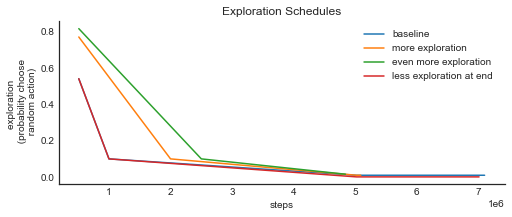

In [115]:
plt.figure(figsize=(8,3))
plt.plot(time_steps,explorations,label='baseline')
plt.plot(time_steps2,explorations2,label='more exploration')
plt.plot(time_steps3,explorations3,label='even more exploration')
plt.plot(time_steps4,explorations4,label='less exploration at end ')
plt.legend()
plt.ylabel('exploration \n (probability choose\n random action)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('steps')
sns.despine()
plt.title('Exploration Schedules')
plt.savefig('figs/Q2_a.png',dpi=300)

### Results: 

- Reducing the exploration to 0.001 from 0.01 at after the algorithm had converged had almost no effect on the mean or best returns (red v blue). In hindsight, this was a dumb schedule to try. But, at least it gives me a sense of the variability in returns for the default exploration schedule. 
- increasing the exploration so that it continued to explore until 2m steps (orange line), yielded returns that were worse until the 2mth step, but then gained ground more quickly after that. Interestingly, although this schedule reached 'good' performance faster than the default schedule, it achieved asymptotic performance around the same time. 
- finally, increasing the exploration even more so that it continued to explore until 2.5m steps yielded returns that were worse until the 2.5mth step, and then faster gains after that. However, by 2.5m steps, the default had already achieved good performance, so there was not much more room to improve. 
- In all, this indicates that increasing exploration early could lead a quicker acension to 'good' performance, but the fine tuning required for perfect performance seemed to require similar amounts of subsequent training after the exploratory period. 

In [116]:
df =df.join(df2,how='outer')
df =df.join(df3,how='outer')
df =df.join(df4,how='outer')
#df.head()

In [117]:
columns = [col for col in df.columns if 'mean' in col]
#columns

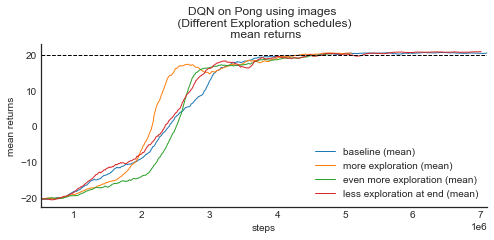

In [118]:
plt.figure(figsize=(8,3))
sns.set_style('white')
df[columns].plot(linewidth=1,figsize=(8,3))
plt.title('DQN on Pong using images \n (Different Exploration schedules) \n mean returns')
plt.axhline(y=20,linestyle='--',color='k',linewidth=1)
sns.despine()
plt.ylabel('mean returns')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('steps')

plt.savefig('figs/Q2_b.png',dpi=300)

In [119]:
columns = [col for col in df.columns if 'best' in col]

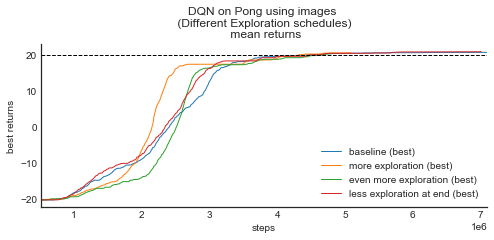

In [120]:
plt.figure(figsize=(8,3))
sns.set_style('white')

df[columns].plot(linewidth=1,figsize=(8,3))
plt.title('DQN on Pong using images \n (Different Exploration schedules) \n mean returns')
plt.axhline(y=20,linestyle='--',color='k',linewidth=1)
sns.despine()
plt.ylabel('best returns')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('steps')

plt.savefig('figs/Q2_c.png',dpi=300)

In [124]:
!jupyter nbconvert --to pdf --template pdf_template_nocode.tplx HW3_gagne.ipynb

Error in sitecustomize; set PYTHONVERBOSE for traceback:
KeyError: 'PYTHONPATH'
Error in sitecustomize; set PYTHONVERBOSE for traceback:
KeyError: 'PYTHONPATH'
[NbConvertApp] Converting notebook HW3_gagne.ipynb to pdf
[NbConvertApp] Support files will be in HW3_gagne_files/
[NbConvertApp] Making directory HW3_gagne_files
[NbConvertApp] Making directory HW3_gagne_files
[NbConvertApp] Making directory HW3_gagne_files
[NbConvertApp] Making directory HW3_gagne_files
[NbConvertApp] Writing 20080 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 106955 bytes to HW3_gagne.pdf
